In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,auc

# Preprocessing of the data

In [15]:
df=pd.read_csv('Customer_churn.csv')

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df=df.drop(columns=["customerID"])

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# handling the missing values

In [21]:
df.TotalCharges = df.TotalCharges.replace({" ":"0.0"})
df.TotalCharges=df.TotalCharges.astype("float")

# encoding the categorical data

In [22]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i,df[i].unique(),"\n")

gender ['Female' 'Male'] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

Churn ['No' 'Yes'] 



In [23]:
mapping={"Male":0,"Female":1}
df.gender=df.gender.map(mapping)

In [24]:
mapping={"No":0,"Yes":1}
df.Partner=df.Partner.map(mapping)
df.Dependents=df.Dependents.map(mapping)
df.PhoneService=df.PhoneService.map(mapping)
df.PaperlessBilling =df.PaperlessBilling .map(mapping)
df.Churn =df.Churn.map(mapping)




In [25]:
mapping={"No":0,"Yes":2,"No internet service":1,"No phone service":1 }
df.MultipleLines=df.MultipleLines.map(mapping)
df.OnlineSecurity=df.OnlineSecurity.map(mapping)
df.OnlineBackup=df.OnlineBackup.map(mapping)
df.TechSupport=df.TechSupport.map(mapping)
df.DeviceProtection=df.DeviceProtection.map(mapping)
df.StreamingTV=df.StreamingTV.map(mapping)
df.StreamingMovies=df.StreamingMovies.map(mapping)

In [26]:
mapping={"No":0,"DSL":1,"Fiber optic":2}
df.InternetService=df.InternetService.map(mapping)

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.PaymentMethod=le.fit_transform(df.PaymentMethod)
df.Contract=le.fit_transform(df.Contract)

In [28]:
for i in ["tenure","TotalCharges","SeniorCitizen"]:
    print(i,df[i].min(),df[i].max())

tenure 0 72
TotalCharges 0.0 8684.8
SeniorCitizen 0 1


# Scaling of the data

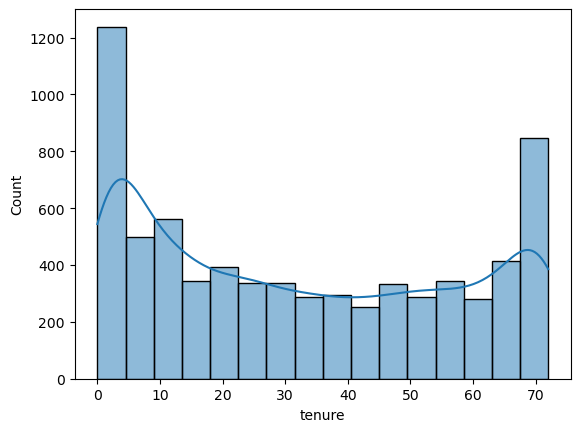

In [29]:
sns.histplot(df["tenure"],kde=True)
plt.show()

In [30]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [31]:
df.tenure=ms.fit_transform(df[["tenure"]])

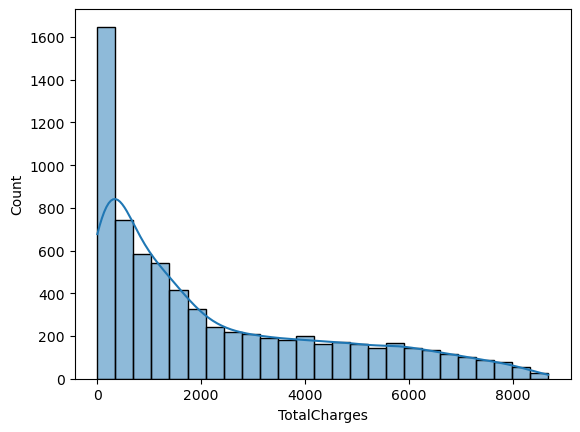

In [32]:
sns.histplot(df["TotalCharges"],kde=True)
plt.show()

In [33]:
from sklearn.preprocessing import RobustScaler
rb=RobustScaler()
df.TotalCharges=rb.fit_transform(df[["TotalCharges"]])

# Dividing the dataset

In [34]:
X=df.drop(columns="Churn")
y=df.Churn

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model1=LogisticRegression()

In [38]:
model1.fit(X_train,y_train)

C:\Users\Kaushal\Downloads\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_predict=model1.predict(X_test)

In [40]:
accuracy_score(y_test,y_predict)

0.8204400283889283

In [41]:
y_probs = model1.predict_proba(X_test)[:, 1]

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

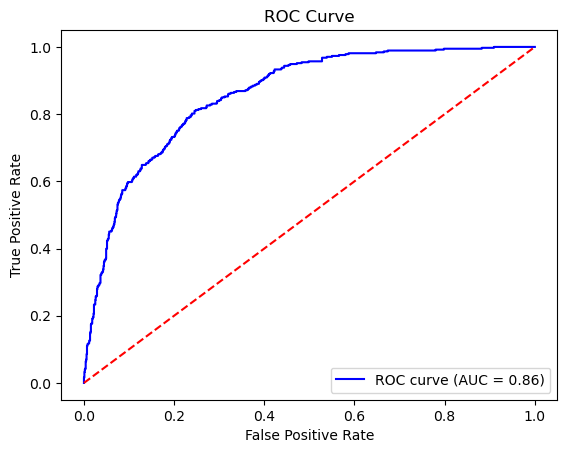

In [43]:
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model2 = RandomForestClassifier()

In [46]:
model2.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_pred = model2.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

0.794180269694819

In [49]:
y_probs = model2.predict_proba(X_test)[:, 1]

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

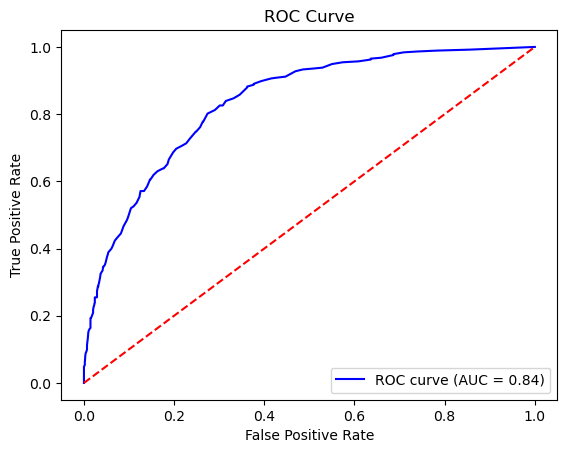

In [51]:
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# XGBoost Model

In [52]:
import xgboost as xgb

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
model3 = xgb.XGBClassifier(
    n_estimators=500,     
    max_depth=6,          
    learning_rate=0.03,   
    subsample=0.8,        
    colsample_bytree=0.8, 
    random_state=42,
    eval_metric='logloss'
)

In [55]:
model3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [56]:
y_predict = model3.predict(X_test)

In [57]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))

XGBoost Accuracy: 0.794180269694819


In [58]:
y_probs = model3.predict_proba(X_test)[:, 1]

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

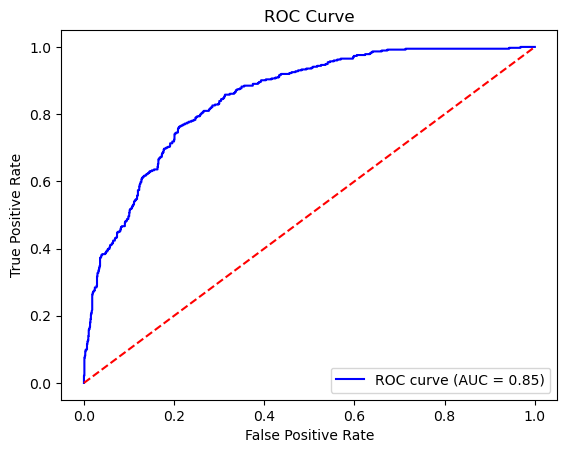

In [60]:
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()